In [57]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

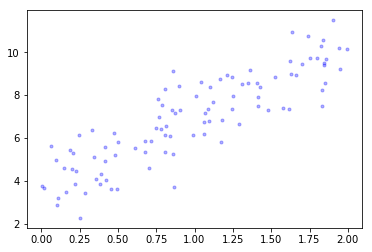

In [58]:
# plot
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(X, y, 'b.', alpha=0.3)

In [59]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.73159345],
       [3.24068053]])

In [60]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.73159345],
       [10.2129545 ]])

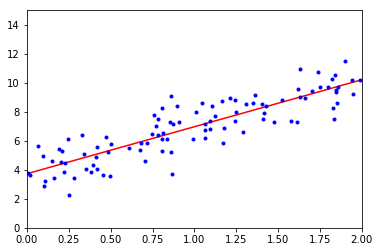

In [61]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [62]:
# the scikit learn equivalent for LinearRegression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
lin_reg.predict(X_new)

[3.73159345] [[3.24068053]]


array([[ 3.73159345],
       [10.2129545 ]])

In [63]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[3.73159345],
       [3.24068053]])

In [64]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([3.70678124]), array([3.22152093]))

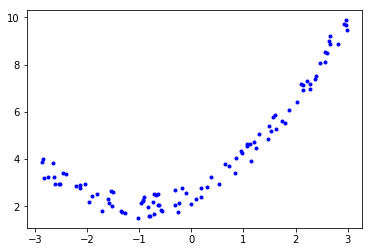

In [65]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.rand(m, 1)

plt.plot(X, y, 'b.')

In [66]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias=False)

X_poly = poly_features.fit_transform(X)

# X_poly now contains the original feature of X plus the square of this feature. Now we can fit a LinearRegression 
# model to this extended training data

In [67]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.55902716]), array([[1.00251878, 0.48794775]]))

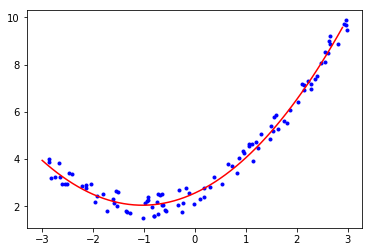

In [72]:
plt.plot(X, y, 'b.')
t = np.arange(-3, 3, 0.1)
plt.plot(t, lin_reg.coef_[0, 1] * t**2 + lin_reg.coef_[0, 0] * t + lin_reg.intercept_, 'r-')